In [ ]:
# Loading in the json file 1 (layer1.json)
import json
with open('/kaggle/input/layer-urls/layer1.json' , 'r') as file:
  data_1 = json.load(file)

In [ ]:
# Storing all the values of (id, title , partition) in a list 
import pandas as pd
from tqdm import tqdm 

id = []
title = []
part = []
recipe_url = [] 

# Looping through and appending the values to a newly created list 
for attr in tqdm(data_1):
  id.append(attr['id'])
  title.append(attr['title'])
  part.append(attr['partition'])
  recipe_url.append(attr['url'])

In [ ]:
# Building a dictionary with above values 
data_1_dict = {'ID': id , 'food_title': title , 'partition': part , "recipe_url": recipe_url}

# Convert this beautiful dict into a fully fledge dataframe 
data1_df = pd.DataFrame(data_1_dict)

In [ ]:
# Looking first 15 samples 
data1_df.head(15)

In [ ]:
data1_df.to_csv("layer1.csv")

In [ ]:
def get_list_of_strings(key , json_file):
    all_ingredient_lists = []
    for recipie in tqdm(json_file):
        ingredients = recipie[key]
        ingredient_list = []
        for ingredient in ingredients:
            ingredient_list.append(ingredient['text'])
            
        all_ingredient_lists.append(ingredient_list)
    return all_ingredient_lists


# Using the above function and parsing out the values
ingredients_list = get_list_of_strings('ingredients' , data_1)
instructions_list = get_list_of_strings('instructions' , data_1)

In [ ]:
# Creating updated list with one individual strings 
updated_ingredients_list = [' /t '.join(ingredients_list[i]) for i in tqdm(range(0 , len(data_1)))] 
updated_instructions_list = [' /t '.join(instructions_list[i]) for i in tqdm(range(0 , len(data_1)))]

In [ ]:
import numpy as np 

data1_df['ingredients'] = pd.Series(updated_ingredients_list)
data1_df['instructions'] = pd.Series(updated_instructions_list)

data1_df.head()

In [ ]:
data1_df.shape

In [ ]:
data1_df.to_csv("layer1.csv", index = False)

So far we have worked on getting a pretty big and beautiful dataframe, now the next step is preprocessing a removing bits of data from our huge dataframe. We can do things like,

Remove recipes with less than 2 ingredients or 2 instructions
Remove recipes that doesnt have a image (but not sure how to find this for now)

In [ ]:
data1_df['food_title'].value_counts()

In [ ]:
# Not needed, but just filtering out the dataframe with food titles 

counts = data1_df['food_title'].value_counts()

# Filtering out the dataframe with the food title 
preprocessed_df = data1_df[~data1_df['food_title'].isin(counts[counts < 2].index)]

preprocessed_df.head()

In [ ]:
preprocessed_df.shape

In [ ]:
preprocessed_df.to_csv("preprocessed_layer1.csv")

In [ ]:
preprocessed_df[preprocessed_df['food_title']=='Banana Bread']

In [ ]:
# Loading in the json file 1 (layer1.json)
import json
with open('/kaggle/input/layer-urls/layer1.json' , 'r') as file:
  data_1 = json.load(file)

In [ ]:
import pandas as pd
import json

# Loading in the json file 1 (layer1.json)
with open('/kaggle/input/layer-urls/layer1.json', 'r') as file:
    data_1 = json.load(file)

# Initialize lists to store data
ingredients_list = []
url_list = []
partition_list = []
title_list = []
id_list = []
instructions_list = []

# Iterate through each record in data_1
for record in data_1:
    # Extracting values from the record
    ingredients_text = ' '.join([ingredient['text'] for ingredient in record['ingredients']])
    instructions_text = ' '.join([instruction['text'] for instruction in record['instructions']])

    # Appending values to respective lists
    ingredients_list.append(ingredients_text)
    url_list.append(record['url'])
    partition_list.append(record['partition'])
    title_list.append(record['title'])
    id_list.append(record['ID'])
    instructions_list.append(instructions_text)

# Creating a DataFrame
df = pd.DataFrame({
    'ingredients': ingredients_list,
    'url': url_list,
    'partition': partition_list,
    'title': title_list,
    'id': id_list,
    'instructions': instructions_list
})

# Save DataFrame to CSV
df.to_csv('layer1_data.csv', index=False)

print("CSV file 'layer1_data.csv' created successfully.")



In [17]:
import pandas as pd

# Read the first two lines of output.csv
df1_head = pd.read_csv('/kaggle/working/layer1_data.csv').head(2)
print("First two lines of output.csv:")
print(df1_head )
print("\n" + "-"*40 + "\n")

First two lines of output.csv:
                                         ingredients  \
0  6 ounces penne 2 cups Beechers Flagship Cheese...   
1  1 c. elbow macaroni 1 c. cubed American cheese...   

                                                 url partition  \
0  http://www.epicurious.com/recipes/food/views/-...     train   
1  http://cookeatshare.com/recipes/dilly-macaroni...     train   

                         title          id  \
0   Worlds Best Mac and Cheese  000018c8a5   
1  Dilly Macaroni Salad Recipe  000033e39b   

                                        instructions  
0  Preheat the oven to 350 F. Butter or oil an 8-...  
1  Cook macaroni according to package directions;...  

----------------------------------------



In [ ]:
import pandas as pd

# Read the first two lines of output.csv
df_output_head = pd.read_csv('/kaggle/working/layer2.csv').head(2)

# Read the first two lines of layer1.csv
df_layer1_head = pd.read_csv('/kaggle/working/layer1_data.csv', delimiter=',').head(2)

# Merge DataFrames based on the 'ID' column
df_merged = pd.merge(df_output_head, df_layer1_head, left_on='ID', right_on='ID')

# Save the merged DataFrame to a new CSV file
df_merged.to_csv('merged_output.csv', index=False)

In [18]:
# Loading in the json file 1 (layer1.json)
import json
with open('/kaggle/input/layer2-data/layer2.json' , 'r') as file:
  data_2 = json.load(file)

In [ ]:
#data_2

In [19]:
# Storing all the values of (id, title , partition) in a list 
import pandas as pd
from tqdm import tqdm 

id = []
title = []
part = []
recipe_url = [] 

# Looping through and appending the values to a newly created list 
for attr in tqdm(data_1):
  id.append(attr['id'])
  title.append(attr['title'])
  part.append(attr['partition'])
  recipe_url.append(attr['url'])

100%|██████████| 1029720/1029720 [00:01<00:00, 727850.15it/s]


In [20]:
# Loading in the json file 1 (layer1.json)
import json
with open('/kaggle/input/layer2-data/layer2.json' , 'r') as file:
  data_2 = json.load(file)

In [22]:
import csv

In [23]:
# Open CSV file for writing
with open('layer2.csv', 'w', newline='') as csvfile:
    # Create a CSV writer
    csv_writer = csv.writer(csvfile)

    # Write header
    csv_writer.writerow(['ID', 'Image_Id'])

    # Iterate over each record in the data
    for record in data_2:
        # Extract values
        record_id = record['id']
        image_ids = [image['id'] for image in record['images']]

        # Write to CSV
        csv_writer.writerow([record_id, image_ids])

In [24]:
import pandas as pd

# Read the first two lines of output.csv
df_output_head = pd.read_csv('/kaggle/working/layer2.csv').head(2)
print("First two lines of output.csv:")
print(df_output_head)
print("\n" + "-"*40 + "\n")

# Read the first two lines of layer1.csv
df_layer1_head = pd.read_csv('/kaggle/working/layer1_data.csv', delimiter='\t').head(2)
print("First two lines of layer1.csv:")
print(df_layer1_head)


First two lines of output.csv:
           ID                                           Image_Id
0  00003a70b1  ['3e233001e2.jpg', '7f749987f9.jpg', 'aaf6b2dc...
1  000075604a                                 ['6bdca6e490.jpg']

----------------------------------------

First two lines of layer1.csv:
     ingredients,url,partition,title,id,instructions
0  6 ounces penne 2 cups Beechers Flagship Cheese...
1  1 c. elbow macaroni 1 c. cubed American cheese...


In [26]:
# Read the first two lines of output.csv
df_merged_head = pd.read_csv('/kaggle/working/combined_Input.csv').head(2)
print("First two lines of output.csv:")
print(df_merged_head)
print("\n" + "-"*40 + "\n")

First two lines of output.csv:
Empty DataFrame
Columns: [ID, Image_Id, ingredients, url, partition, title, id, instructions]
Index: []

----------------------------------------



In [ ]:
import pandas as pd

# Read the first two lines of output.csv
df_output_head = pd.read_csv('/kaggle/working/layer2.csv')

# Read the first two lines of layer1.csv
df_layer1_head = pd.read_csv('/kaggle/input/layer1-preprocessed/preprocessed_layer1.csv', delimiter=',')

# Merge DataFrames based on the 'ID' column
df_final_merged = pd.merge(df_output_head, df_layer1_head, left_on='ID', right_on='ID')

# Save the merged DataFrame to a new CSV file
df_final_merged.to_csv('both_merged_output.csv', index=False)



In [ ]:
# Read the first two lines of output.csv
df_merged_head = pd.read_csv('/kaggle/working/both_merged_output.csv').head(5)
print("First two lines of output.csv:")
print(df_merged_head)
print("\n" + "-"*40 + "\n")

In [ ]:
import pandas as pd
# Read the first two lines of output.csv
df_merged_head = pd.read_csv('/kaggle/input/merged-dataset-input/merged_layer1_and_layer2.csv').head(5)
print("First two lines of output.csv:")
print(df_merged_head)
print("\n" + "-"*40 + "\n")

In [ ]:
import pandas as pd

# Read the merged dataset
df_merged = pd.read_csv('/kaggle/working/both_merged_output.csv')

# Display basic information about the DataFrame
print("Basic Information:")
print(df_merged.info())
print("\n" + "-"*40 + "\n")

# Display summary statistics for numeric columns
print("Summary Statistics:")
print(df_merged.describe())
print("\n" + "-"*40 + "\n")

# Display the number of unique dishes
unique_dishes = df_merged['food_title'].nunique()
print(f"Number of Unique Dishes: {unique_dishes}")
print("\n" + "-"*40 + "\n")

# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_Id'].apply(lambda x: eval(x.iloc[0])).apply(len)
print("Number of Images for Each Dish:")
print(images_per_dish)
print("\n" + "-"*40 + "\n")

# Display other relevant insights based on your dataset

# For example, you can display the distribution of the 'partition' column
print("Distribution of 'partition' column:")
print(df_merged['partition'].value_counts())


In [ ]:
import pandas as pd

# Read the merged dataset
df_merged = pd.read_csv('/kaggle/input/merged-dataset-input/merged_layer1_and_layer2.csv')

# Display basic information about the DataFrame
print("Basic Information:")
print(df_merged.info())
print("\n" + "-"*40 + "\n")

# Display summary statistics for numeric columns
print("Summary Statistics:")
print(df_merged.describe())
print("\n" + "-"*40 + "\n")

# Display the number of unique dishes
unique_dishes = df_merged['food_title'].nunique()
print(f"Number of Unique Dishes: {unique_dishes}")
print("\n" + "-"*40 + "\n")

# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['images_id'].apply(lambda x: len(x.iloc[0].split())).sort_values(ascending=False)
print("Number of Images for Each Dish:")
print(images_per_dish.head(20))  # Displaying the top 20
print("\n" + "-"*40 + "\n")

# Display other relevant insights based on your dataset

# For example, you can display the distribution of the 'partition' column
print("Distribution of 'partition' column:")
print(df_merged['partition'].value_counts())


In [ ]:
df_merged.head()

In [ ]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df_merged.head())
print("\n" + "-"*40 + "\n")
print("Summary Statistics:")
print(df_merged.describe())
print("\n" + "-"*40 + "\n")
print("Data Types:")
print(df_merged.dtypes)
print("\n" + "-"*40 + "\n")
print("Missing Values:")
print(df_merged.isnull().sum())


In [ ]:
# Display the number of unique dishes
unique_dishes = df_merged['food_title'].nunique()
print(f"Number of Unique Dishes: {unique_dishes}")
print("\n" + "-"*40 + "\n")


In [ ]:
# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_Id'].apply(lambda x: eval(x.iloc[0])).apply(len)
print("Number of Images for Each Dish:")
print(images_per_dish)
print("\n" + "-"*40 + "\n")


In [ ]:
# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_Id'].apply(lambda x: eval(x.iloc[0])).apply(len)

# Sort the dishes based on the number of images in descending order
sorted_images_per_dish = images_per_dish.sort_values(ascending=False)

# Print the top 20 dishes
print("Top 20 Dishes with the Highest Number of Images:")
print(sorted_images_per_dish.head(20))
print("\n" + "-"*40 + "\n")


Distribution of 'Partition' (Train/Test):
Examine the distribution of the 'partition' column to understand the data split between training and test sets.

In [ ]:
# Display the distribution of 'partition' column
print("Distribution of 'partition' column:")
print(df_merged['partition'].value_counts())
print("\n" + "-"*40 + "\n")


Ingredient Analysis:
Explore the ingredients column to identify common ingredients, check for variability, and analyze ingredient lengths.

In [ ]:
# Analyze ingredients column
df_merged['num_ingredients'] = df_merged['ingredients'].apply(lambda x: len(x.split('/t')))
print("Average Number of Ingredients:")
print(df_merged['num_ingredients'].mean())
print("\n" + "-"*40 + "\n")
print("Ingredients with Maximum Length:")
print(df_merged.loc[df_merged['num_ingredients'].idxmax(), 'ingredients'])
print("\n" + "-"*40 + "\n")


Recipe Length Analysis:
Analyze the length of recipe instructions.

In [ ]:
# Analyze instructions column
df_merged['instruction_length'] = df_merged['instructions'].apply(lambda x: len(x.split()))
print("Average Recipe Instruction Length:")
print(df_merged['instruction_length'].mean())
print("\n" + "-"*40 + "\n")
print("Recipe with Maximum Instruction Length:")
print(df_merged.loc[df_merged['instruction_length'].idxmax(), 'instructions'])
print("\n" + "-"*40 + "\n")


Distribution of 'partition' (Train/Test):
Visualize the distribution of the 'partition' column using a bar plot.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'partition'
sns.countplot(x='partition', data=df_merged)
plt.title('Distribution of Partition (Train/Test)')
plt.show()


Number of Images per Dish:
Create a bar plot to show the number of images for each dish.

In [ ]:
# Bar plot for number of images per dish
plt.figure(figsize=(12, 6))
sns.barplot(x=images_per_dish.index, y=images_per_dish.values)
plt.title('Number of Images for Each Dish')
plt.xticks(rotation=45, ha='right')
plt.show()


Word Cloud for Ingredients:
Generate a word cloud to visualize common ingredients.

In [ ]:
from wordcloud import WordCloud

# Combine all ingredients into a single string
all_ingredients = ' '.join(df_merged['ingredients'].str.replace('/t', '').values)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ingredients')
plt.show()


In [ ]:
from collections import Counter


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df_merged is the merged DataFrame with 'ingredients' column
ingredients_series = df_merged['ingredients'].str.replace('/t', '').str.split()

In [ ]:
ingredients_series

In [ ]:
# Flatten the list of ingredients
all_ingredients = [ingredient for sublist in ingredients_series.values for ingredient in sublist]

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)
#ingredient_counts

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Assuming df_merged is the merged DataFrame with 'ingredients' column
ingredients_series = df_merged['ingredients'].str.replace('\t', '').str.split()

# Flatten the list of ingredients
all_ingredients = [ingredient.lower() for sublist in ingredients_series.values for ingredient in sublist if ingredient.isalpha()]

# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Manually create a list of common ingredients to exclude non-ingredients
common_ingredients_to_exclude = set(['cup', 'cups', 'teaspoon', 'tablespoons', 'chopped', 'salt', 'sugar', 'teaspoons', 'tablespoon', 'pepper', 'ground', 'fresh', 'oil', 'flour', 'whole', 'cheese', 'butter', 'cream', 'sliced', 'powder', 'milk', 'can', 'water', 'chicken', 'vanilla', 'garlic', 'large', 'baking', 'red', 'cut', 'sauce', 'white', 'into', 'minced', 'juice', 'olive', 'black', 'green', 'shredded', 'diced', 'ounces', 'lb', 'eggs', 'finely', 'grated', 'brown', 'lemon', 'dried', 'egg', 'divided', 'medium', 'extract', 'onion', 'kraft', 'small', 'cinnamon', 'taste', 'softened', 'tsp', 'slices', 'chocolate', 'drained', 'vegetable', 'tbsp', 'cloves', 'frozen', 'soda', 'package', 'vinegar', 'thru', 'beef', 'peeled', 'melted', 'cooked', 'mix', 'crushed', 'parmesan', 'pieces', 'in', 'cheddar', 'sour', 'pound', 'unsalted', 'dry', 'broth', 'thinly', 'bell', 'weight', 'leaves', 'tomato', 'tomatoes', 'freshly', 'light', 'parsley', 'rice', 'boneless', 'dressing', 'packed', 'italian', 'pinch', 'beaten', 'wine', 'corn', 'mustard', 'orange', 'hot', 'chili', 'bread', 'chips', 'thawed', 'basil', 'soy', 'granulated', 'yellow', 'plus', 'kosher', 'skinless', 'with', 'lbs', 'ginger', 'seasoning', 'mayonnaise', 'cumin', 'the', 'honey', 'pounds', 'cans', 'lime', 'a', 'sweet', 'grams', 'cold', 'whip', 'g', 'use', 'nutmeg', 'clove', 'onions', 'extra', 'oregano', 'heavy', 'powdered', 'coconut', 'whipped', 'instant', 'philadelphia', 'celery', 'wheat', 'dash', 'mozzarella', 'margarine', 'coarsely', 'more', 'cubes', 'cilantro', 'thyme', 'cubed', 'inch', 'oz', 'soup', 'syrup', 'peanut', 'uncooked', 'strips', 'toasted'])

# Filter out common words, units, and non-ingredients
filtered_ingredients = [ingredient for ingredient, count in ingredient_counts.items() if count >= 800 and ingredient not in common_ingredients_to_exclude]

# Check if the number of unique ingredients is greater than the desired number of clusters
if len(set(filtered_ingredients)) >= 5:
    # Create a new DataFrame with common recipes and their ingredients
    common_recipes = df_merged[df_merged['ingredients'].apply(lambda x: any(ingredient in x.lower() for ingredient in filtered_ingredients))]
    common_recipes = common_recipes.reset_index(drop=True)

    # Train Word2Vec model on the common recipes
    model = Word2Vec(sentences=common_recipes['ingredients'].str.replace('\t', '').str.split(), vector_size=100, window=5, min_count=1, workers=4)




In [ ]:
    # Extract vectors for each ingredient, checking if the ingredient is present in the model's vocabulary
    ingredient_vectors = []
    for ingredient in filtered_ingredients:
        if ingredient in model.wv:
            ingredient_vectors.append(model.wv[ingredient])
        else:
            print(f"Warning: '{ingredient}' not present in Word2Vec model's vocabulary.")


In [ ]:
    # Use K-Means clustering to cluster ingredients
    num_clusters = 5  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(ingredient_vectors)

    # Add cluster information to the common_recipes DataFrame
    common_recipes['cluster'] = clusters

In [12]:
import pandas as pd
# Read the first two lines of output.csv
df_merged_head = pd.read_csv('/kaggle/input/merged-dataset-input/merged_layer1_and_layer2.csv').head(2)
print("First two lines of output.csv:")
print(df_merged_head)
print("\n" + "-"*40 + "\n")

First two lines of output.csv:
   Unnamed: 0          ID                       food_title partition  \
0           0  00003a70b1        Crunchy Onion Potato Bake      test   
1           1  000075604a  Kombu Tea Grilled Chicken Thigh     train   

                                          recipe_url  \
0  http://www.food.com/recipe/crunchy-onion-potat...   
1  https://cookpad.com/us/recipes/150100-kombu-te...   

                                         ingredients  \
0  2 12 cups milk /t 1 12 cups water /t 14 cup bu...   
1  2 Chicken thighs /t 2 tsp Kombu tea /t 1 White...   

                                        instructions  \
0  Preheat oven to 350 degrees Fahrenheit. /t Spr...   
1  Pierce the skin of the chicken with a fork or ...   

                                           images_id  \
0  3e233001e2.jpg /t 7f749987f9.jpg /t aaf6b2dcd3...   
1                                     6bdca6e490.jpg   

                                          images_url  
0  http://img.sndimg.

In [16]:
import pandas as pd

# Assuming df is your DataFrame
# Let's create a new column 'cleaned_images_id' by splitting and stripping the image IDs
df_merged['Image_id'] = df_merged['images_id'].apply(lambda x: [img.strip() for img in x.split('/t')] if isinstance(x, str) else [])

# Now you can modify the DataFrame as per your requirements
# For example, you can drop the original 'images_id' column
df_merged = df_merged.drop('images_id', axis=1)

# Save the cleaned DataFrame to a new CSV file
df_merged.to_csv('cleaned_output.csv', index=False)




In [17]:
import pandas as pd
# Read the first two lines of output.csv
df_merged_head = pd.read_csv('/kaggle/working/cleaned_output.csv').head(2)
print("First two lines of output.csv:")
print(df_merged_head)
print("\n" + "-"*40 + "\n")

First two lines of output.csv:
   Unnamed: 0          ID                       food_title partition  \
0           0  00003a70b1        Crunchy Onion Potato Bake      test   
1           1  000075604a  Kombu Tea Grilled Chicken Thigh     train   

                                          recipe_url  \
0  http://www.food.com/recipe/crunchy-onion-potat...   
1  https://cookpad.com/us/recipes/150100-kombu-te...   

                                         ingredients  \
0  2 12 cups milk /t 1 12 cups water /t 14 cup bu...   
1  2 Chicken thighs /t 2 tsp Kombu tea /t 1 White...   

                                        instructions  \
0  Preheat oven to 350 degrees Fahrenheit. /t Spr...   
1  Pierce the skin of the chicken with a fork or ...   

                                          images_url  num_ingredients  \
0  http://img.sndimg.com/food/image/upload/w_512,...                7   
1  https://img-global.cpcdn.com/001_recipes/58069...                3   

                         

In [19]:
import pandas as pd

# Read the merged dataset
df_merged = pd.read_csv('/kaggle/working/cleaned_output.csv')

# Display basic information about the DataFrame
print("Basic Information:")
print(df_merged.info())
print("\n" + "-"*40 + "\n")

# Display summary statistics for numeric columns
print("Summary Statistics:")
print(df_merged.describe())
print("\n" + "-"*40 + "\n")

# Display the number of unique dishes
unique_dishes = df_merged['food_title'].nunique()
print(f"Number of Unique Dishes: {unique_dishes}")
print("\n" + "-"*40 + "\n")

# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_id'].apply(lambda x: len(x.iloc[0].split())).sort_values(ascending=False)
print("Number of Images for Each Dish:")
print(images_per_dish.head(20))  # Displaying the top 20
print("\n" + "-"*40 + "\n")

# Display other relevant insights based on your dataset

# For example, you can display the distribution of the 'partition' column
print("Distribution of 'partition' column:")
print(df_merged['partition'].value_counts())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402760 entries, 0 to 402759
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       402760 non-null  int64 
 1   ID               402760 non-null  object
 2   food_title       402760 non-null  object
 3   partition        402760 non-null  object
 4   recipe_url       402760 non-null  object
 5   ingredients      402759 non-null  object
 6   instructions     402760 non-null  object
 7   images_url       402760 non-null  object
 8   num_ingredients  402760 non-null  int64 
 9   Image_id         402760 non-null  object
dtypes: int64(2), object(8)
memory usage: 30.7+ MB
None

----------------------------------------

Summary Statistics:
          Unnamed: 0  num_ingredients
count  402760.000000    402760.000000
mean   201379.500000         9.205765
std    116266.941547         4.146997
min         0.000000         1.000000
25%    10

In [20]:
# Display basic information about the DataFrame
print("Basic Information:")
print(df_merged.head())
print("\n" + "-"*40 + "\n")
print("Summary Statistics:")
print(df_merged.describe())
print("\n" + "-"*40 + "\n")
print("Data Types:")
print(df_merged.dtypes)
print("\n" + "-"*40 + "\n")
print("Missing Values:")
print(df_merged.isnull().sum())

Basic Information:
   Unnamed: 0          ID                                         food_title  \
0           0  00003a70b1                          Crunchy Onion Potato Bake   
1           1  000075604a                    Kombu Tea Grilled Chicken Thigh   
2           2  00007bfd16                       Strawberry Rhubarb Dump Cake   
3           3  000095fc1d                                    Yogurt Parfaits   
4           4  0000b1e2b5  Fennel-Rubbed Pork Tenderloin with Roasted Fen...   

  partition                                         recipe_url  \
0      test  http://www.food.com/recipe/crunchy-onion-potat...   
1     train  https://cookpad.com/us/recipes/150100-kombu-te...   
2     train  http://www.food.com/recipe/strawberry-rhubarb-...   
3     train  http://tastykitchen.com/recipes/breakfastbrunc...   
4     train  http://www.epicurious.com/recipes/food/views/f...   

                                         ingredients  \
0  2 12 cups milk /t 1 12 cups water /t 14 cup 

In [21]:
# Display the number of unique dishes
unique_dishes = df_merged['food_title'].nunique()
print(f"Number of Unique Dishes: {unique_dishes}")
print("\n" + "-"*40 + "\n")

Number of Unique Dishes: 341958

----------------------------------------



In [22]:
# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_id'].apply(lambda x: len(x.iloc[0].split())).sort_values(ascending=False)
print("Number of Images for Each Dish:")
print(images_per_dish)
print("\n" + "-"*40 + "\n")


Number of Images for Each Dish:
food_title
Marshmallow Fondant                       1400
To Die For Blueberry Muffins               997
Sugar Cookie Icing                         966
Chicken Pot Pie IX                         800
Chantal's New York Cheesecake              742
                                          ... 
" Chef Salad" Dressing                       1
" Chex Honey - Peanut Party Mix "            1
" Berry French Toast" Oatmeal                1
" Better Than Cinnabon" Cinnamon Rolls       1
" Big Mac" Meatloaf                          1
Name: Image_id, Length: 341958, dtype: int64

----------------------------------------



In [23]:
# Display the number of images for each dish
images_per_dish = df_merged.groupby('food_title')['Image_id'].apply(lambda x: len(x.iloc[0].split())).sort_values(ascending=False)

# Sort the dishes based on the number of images in descending order
sorted_images_per_dish = images_per_dish.sort_values(ascending=False)

# Print the top 20 dishes
print("Top 20 Dishes with the Highest Number of Images:")
print(sorted_images_per_dish.head(20))
print("\n" + "-"*40 + "\n")


Top 20 Dishes with the Highest Number of Images:
food_title
Marshmallow Fondant                    1400
To Die For Blueberry Muffins            997
Sugar Cookie Icing                      966
Chicken Pot Pie IX                      800
Chantal's New York Cheesecake           742
Clone of a Cinnabon                     713
Cake Balls                              700
Carrot Cake III                         606
Bomb Ass Potatoes                       570
Buttercream Icing                       533
Bacon Wrapped Chicken Breast            515
Parmesan Chicken Squares                502
Good Old Fashioned Pancakes             450
Jay's Signature Pizza Crust             416
Delicious Ham and Potato Soup           392
Mrs. Sigg's Snickerdoodles              386
Downeast Maine Pumpkin Bread            377
Rick's Special Buttercream Frosting     375
Cream Cheese Frosting II                373
Special Buttercream Frosting            364
Name: Image_id, dtype: int64

------------------------------

In [24]:
# Display the distribution of 'partition' column
print("Distribution of 'partition' column:")
print(df_merged['partition'].value_counts())
print("\n" + "-"*40 + "\n")

Distribution of 'partition' column:
partition
train    281598
test      60740
val       60422
Name: count, dtype: int64

----------------------------------------



In [25]:
df_merged['ingredients']

0         2 12 cups milk /t 1 12 cups water /t 14 cup bu...
1         2 Chicken thighs /t 2 tsp Kombu tea /t 1 White...
2         6 -8 cups fresh rhubarb, or /t 6 -8 cups froze...
3         8 ounces, weight Light Fat Free Vanilla Yogurt...
4         1 teaspoon fennel seeds /t 1 pound pork tender...
                                ...                        
402755    2 flour tortillas, Soft Taco Size /t 4 tablesp...
402756    1 dozen eggs /t 1 paprika /t 1 salt and pepper...
402757    150 grams Daikon radish /t 1 tbsp Sesame oil /...
402758    1 cup apple cider /t 6 tablespoons sugar /t 4 ...
402759    1 pound ground veal /t 1/2 pound sweet Italian...
Name: ingredients, Length: 402760, dtype: object

In [26]:
import pandas as pd

# Assuming df_merged is your DataFrame
# If it contains NaN values in 'ingredients', fill them with an empty string or any suitable value
df_merged['ingredients'] = df_merged['ingredients'].fillna('')

# Analyze ingredients column
df_merged['num_ingredients'] = df_merged['ingredients'].apply(lambda x: len(x.split('/t')) if isinstance(x, str) else 0)
print("Average Number of Ingredients:")
print(df_merged['num_ingredients'].mean())
print("\n" + "-"*40 + "\n")

# Ingredients with Maximum Length
max_ingredients_row = df_merged.loc[df_merged['num_ingredients'].idxmax()]
max_ingredients_list = max_ingredients_row['ingredients'].split('/t') if isinstance(max_ingredients_row['ingredients'], str) else []

print("Ingredients with Maximum Length:")
for ingredient in max_ingredients_list:
    print(ingredient)
print("\n" + "-"*40 + "\n")



Average Number of Ingredients:
9.205765219982123

----------------------------------------

Ingredients with Maximum Length:
1/2 cup dry mustard powder 
 1/2 cup ground turmeric 
 1/2 cup Sugar 
 2 tbsp salt 
 2 tbsp Sugar 
 2 tbsp Brown sugar 
 2 tbsp ground cumin 
 2 tbsp chilli powder 
 2 tbsp freshly ground black pepper 
 1 tbsp Cayenne chilli pepper 
 4 tbsp paprika 
 1/2 cup paprika 
 2 tsp ground allspice 
 2 tsp ground coriander 
 2 tsp dry mustard 
 3 tbsp cumin 
 1 tbsp dried oregano 
 1 tbsp Brown sugar 
 2 tbsp celery seeds (finely crushed) 
 2 tbsp onion powder 
 3 tbsp black pepper 
 3 tbsp salt 
 1/4 cup chilli powder (your choice on how hot) 
 1/4 cup garlic powder 
 1 tbsp onion powder 
 1 tbsp garlic powder 
 1 tbsp Cayenne chilli pepper (change to suit preferences) 
 1 tbsp white pepper 
 1 tbsp black pepper 
 2 tbsp table salt 
 1/2 cup paprika 
 1 cup dark brown sugar 
 2 tbsp salt 
 2 tbsp oregano 
 3 tbsp onion powder 
 3 tbsp garlic powder 
 1/3 cup Brown sugar 

In [27]:
# Analyze instructions column
df_merged['instruction_length'] = df_merged['instructions'].apply(lambda x: len(x.split()))
print("Average Recipe Instruction Length:")
print(df_merged['instruction_length'].mean())
print("\n" + "-"*40 + "\n")
print("Recipe with Maximum Instruction Length:")
print(df_merged.loc[df_merged['instruction_length'].idxmax(), 'instructions'])
print("\n" + "-"*40 + "\n")


Average Recipe Instruction Length:
127.25229417022544

----------------------------------------

Recipe with Maximum Instruction Length:
Preheat oven to 350 (175 degrees C). /t Triple wrap the outside of your spring form pan tightly with tinfoil. /t Make certain there are no holes or tears in the foil that water can seep through. /t Spray Pam a 9 inch spring form pan. /t In a medium bowl, mix graham cracker crust crumbs with melted butter. /t Reserve a small amount of your crust after mixing. /t Press on to bottom of spring form pan and halfway up the sides. /t Note: I use a few stiff paper plates that are stuck together and press down firmly with that. /t This will make a thicker, more sturdy crust than the average. /t If using boxed, crushed Graham Crackers, double the amount the recipe calls for one pie crust. /t Bake crust in oven at 350 for 8 to 9 minutes on the bottom 1/3 rack of your oven. /t After baking, fill in any cracks with additional graham cracker crust. /t Press firmly 

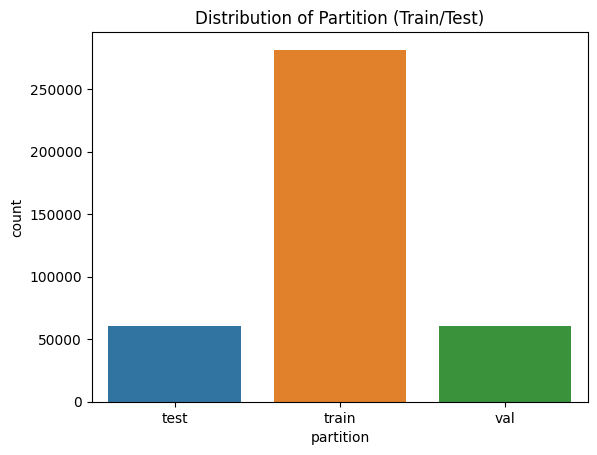

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'partition'
sns.countplot(x='partition', data=df_merged)
plt.title('Distribution of Partition (Train/Test)')
plt.show()

In [ ]:
# Bar plot for number of images per dish
plt.figure(figsize=(12, 6))
sns.barplot(x=images_per_dish.index, y=images_per_dish.values)
plt.title('Number of Images for Each Dish')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from wordcloud import WordCloud

# Combine all ingredients into a single string
all_ingredients = ' '.join(df_merged['ingredients'].str.replace('/t', '').values)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ingredients')
plt.show()